In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
df=pd.read_csv('BlinkIT-Grocery-Data.csv')

In [5]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

In [8]:
df['Item Fat Content'].value_counts()

Item Fat Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [9]:
df['Item Fat Content']=df['Item Fat Content'].replace({
    'LF':'Low Fat',
    'low fat':'Low Fat',
    'reg':'Regular'
})

df['Item Fat Content'].value_counts()

Item Fat Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [10]:
df['Outlet Establishment Year'].value_counts()


Outlet Establishment Year
2018    1463
2014     932
2012     930
2017     930
2016     930
2015     929
2022     928
2020     926
2011     555
Name: count, dtype: int64

In [11]:
df['Outlet Location Type'].value_counts()

Outlet Location Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [12]:
df['Item Type'].value_counts()

Item Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [13]:
y=df['Outlet Size'].value_counts()


In [14]:
df['Outlet Type'].value_counts()

Outlet Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [15]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2016.450546,0.066132,12.857645,140.992783,3.965857
std,3.189396,0.051598,4.643456,62.275067,0.605651
min,2011.000000,0.000000,4.555000,31.290000,1.000000
25%,2014.000000,0.026989,8.773750,93.826500,4.000000
50%,2016.000000,0.053931,12.600000,143.012800,4.000000
75%,2018.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


# The Avg Sales- 141M
# The Avg Rating- 3.96
# The Number of Items - 8523

In [16]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [17]:
fc=df['Item Fat Content'].value_counts()

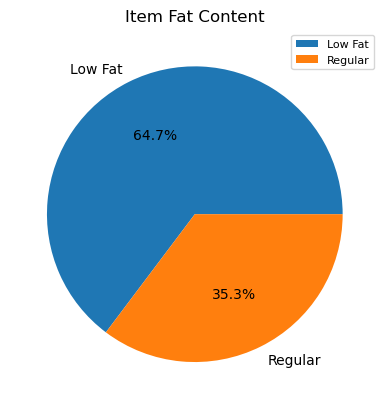

In [18]:
plt.pie(fc,labels=fc.index,autopct='%1.1f%%' )
plt.legend(loc='upper right',fontsize='8')
plt.title('Item Fat Content')
plt.show()

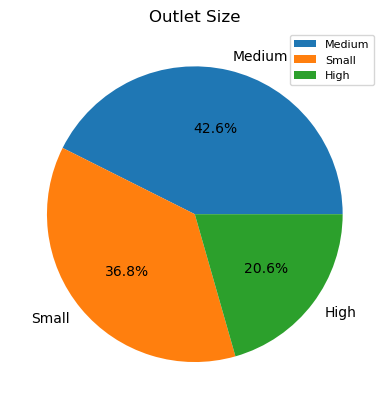

In [19]:

plt.pie(y,labels=y.index,autopct='%1.1f%%' )
plt.legend(loc='upper right',fontsize='8')
plt.title('Outlet Size')
plt.show()

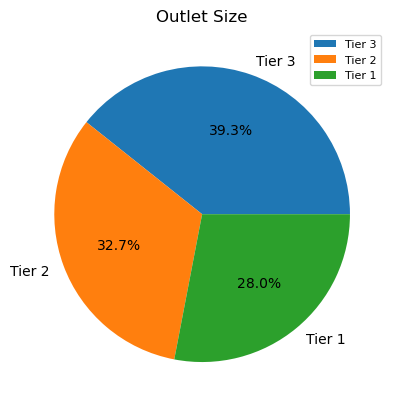

In [20]:
ol=df['Outlet Location Type'].value_counts()
plt.pie(ol,labels=ol.index,autopct='%1.1f%%' )
plt.legend(loc='upper right',fontsize='8')
plt.title('Outlet Size')
plt.show()

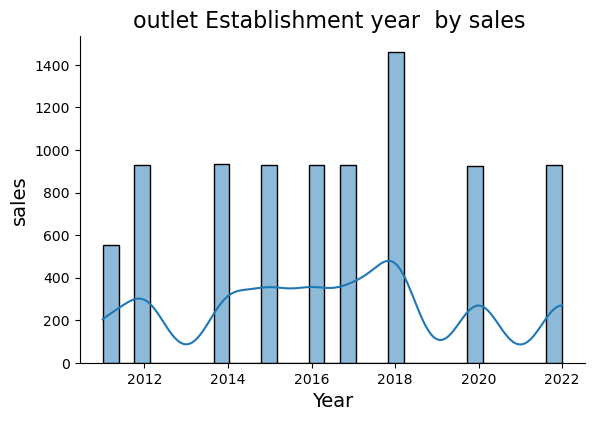

In [21]:
sns.displot(df['Outlet Establishment Year'], kde=True, height=4, aspect=1.5,palette='set2')
plt.title("outlet Establishment year  by sales ", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("sales", fontsize=14)
plt.show()

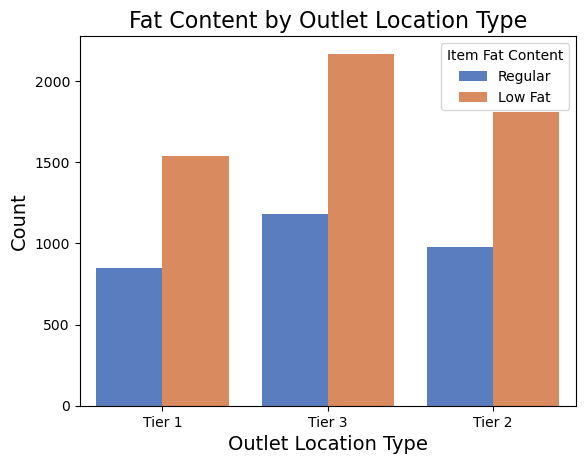

In [22]:
sns.countplot(data=df, 
              x='Outlet Location Type', 
              hue='Item Fat Content', 
              palette='muted', 
              dodge=True)
plt.title("Fat Content by Outlet Location Type", fontsize=16)
plt.xlabel("Outlet Location Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

In [31]:
# Calculate total sales per Outlet Location Type
total_sales_by_location=df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
total_sales_by_location['Sales'] = total_sales_by_location['Sales'] / 1000  # Convert to Millions


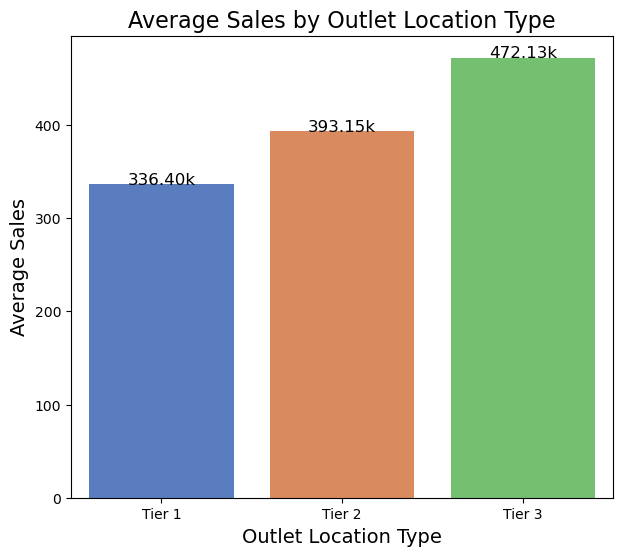

In [38]:
plt.figure(figsize=(7,6))
sns.barplot(data=total_sales_by_location,
            x='Outlet Location Type',
            y='Sales',
            palette='muted'
    
)
plt.title("Average Sales by Outlet Location Type", fontsize=16)
plt.xlabel("Outlet Location Type", fontsize=14)
plt.ylabel("Average Sales", fontsize=14)
for index, row in total_sales_by_location.iterrows():
    plt.text(index, row['Sales'] + 0.05, f"{row['Sales']:.2f}k", ha='center', fontsize=12)
plt.show()

In [39]:
# Aggregate data for metrics
df_metrics=df.groupby('Outlet Type').agg(
    total_sales=('Sales',"sum"),
    No_items=('Item Type','count'),
    Avg_sales=("Sales",'mean'),
    avg_rating=('Rating','mean')
).reset_index()
print(df_metrics)

         Outlet Type  total_sales  No_items   Avg_sales  avg_rating
0      Grocery Store  151939.1490      1083  140.294690    3.985873
1  Supermarket Type1  787549.8928      5577  141.213895    3.963242
2  Supermarket Type2  131477.7764       928  141.678638    3.971228
3  Supermarket Type3  130714.6746       935  139.801791    3.952941


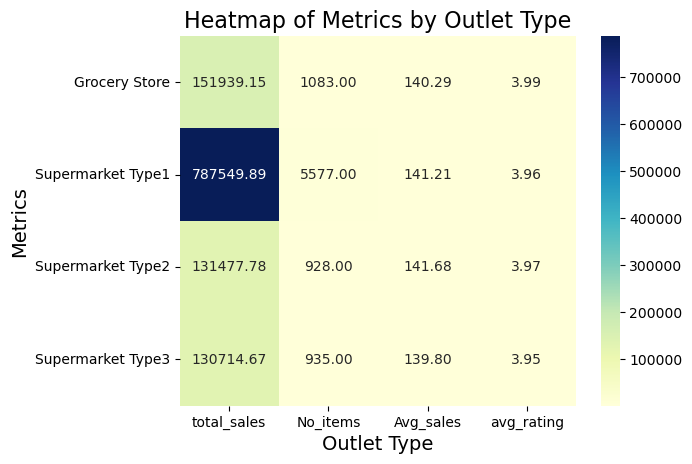

In [41]:

df_heatmap=df_metrics.set_index('Outlet Type')
plt.Figure(figsize=(7,6))

sns.heatmap(df_heatmap,annot=True,fmt='.2f',cmap='YlGnBu')
plt.title('Heatmap of Metrics by Outlet Type', fontsize=16)
plt.xlabel('Outlet Type', fontsize=14)
plt.ylabel('Metrics', fontsize=14)
plt.show()
